In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import re

In [3]:
#read xls sheet
goals=pd.read_excel(open('UEFA Champions League 2016-2022 Data.xlsx', 'rb'),
              sheet_name='goals')

In [4]:
#read xls sheet
players=pd.read_excel(open('UEFA Champions League 2016-2022 Data.xlsx', 'rb'),
              sheet_name='players')  

In [74]:
#read xls sheet
matches=pd.read_excel(open('UEFA Champions League 2016-2022 Data.xlsx', 'rb'),
              sheet_name='matches')  

In [5]:
#remove playerw with no team
players = players.dropna(subset=['TEAM'])

In [6]:
#need to fill the first name with empty string since we are going combine to get full name
# nan + anythin = nan

players['FIRST_NAME'] = players['FIRST_NAME'].fillna('')

In [11]:
#create column wil fullName
players['fName'] = players.apply(lambda row: (row['FIRST_NAME']+' '+row['LAST_NAME']).strip(),axis=1)

In [12]:
players

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT,fName
0,ply510,,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R,Danilo
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R,Mattia De Sciglio
2,ply512,Federico,Gatti,Italy,1998-06-24,Juventus,15.0,Defender,190.0,84.0,R,Federico Gatti
3,ply513,Daniele,Rugani,Italy,1994-07-29,Juventus,24.0,Defender,190.0,84.0,R,Daniele Rugani
4,ply514,Enzo,Barrenechea,Argentina,2001-05-22,Juventus,45.0,Midfielder,186.0,81.0,L,Enzo Barrenechea
...,...,...,...,...,...,...,...,...,...,...,...,...
2701,ply2702,Vladislav,Naydenov,Bulgaria,2001-11-29,PFC Ludogorets Razgrad,38.0,Forward,167.0,NaN,NaN,Vladislav Naydenov
2702,ply2703,,Rick,Brazil,1999-09-02,PFC Ludogorets Razgrad,73.0,Forward,170.0,66.0,NaN,Rick
2703,ply2704,Bernard,Tekpetey,Ghana,1997-09-03,PFC Ludogorets Razgrad,37.0,Forward,172.0,69.0,R,Bernard Tekpetey
2704,ply2705,,Thiago,Brazil,2001-06-26,PFC Ludogorets Razgrad,9.0,Forward,188.0,85.0,R,Thiago


In [48]:
#https://www.thestatszone.com/the-stats-room/a-breakdown-of-cristiano-ronaldos-champions-league-goals
#https://en.wikipedia.org/wiki/List_of_UEFA_Champions_League_top_scorers#:~:text=With%20140%20goals%2C%20Cristiano%20Ronaldo,with%20seven%20and%20six%20respectively.

#get row of ronaldo
players[players['fName'].str.contains('ronaldo',flags=re.I,regex=True)]

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT,fName
189,ply699,Cristiano,Ronaldo,Portugal,1985-02-05,Manchester United,7.0,Forward,187.0,83.0,NaN,Cristiano Ronaldo


In [67]:
#get pid from row of ronaldo
r=players[players['fName'].str.contains('ronaldo',flags=re.I,regex=True)]
r['PLAYER_ID'].values[0]

'ply699'

In [172]:
#get pid from row of ronaldo
r=players[players['fName'].str.contains('ronaldo',flags=re.I,regex=True)]
ppid=r.iloc[0]['PLAYER_ID']

ppid

'ply699'

In [76]:
#merge matches and goals to
mg=pd.merge(matches,goals)

In [78]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 0 to 2278
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MATCH_ID           2279 non-null   object
 1   SEASON             2279 non-null   object
 2   DATE_TIME          2279 non-null   object
 3   HOME_TEAM          2279 non-null   object
 4   AWAY_TEAM          2279 non-null   object
 5   STADIUM            2279 non-null   object
 6   HOME_TEAM_SCORE    2279 non-null   int64 
 7   AWAY_TEAM_SCORE    2279 non-null   int64 
 8   PENALTY_SHOOT_OUT  2279 non-null   int64 
 9   ATTENDANCE         2279 non-null   int64 
 10  GOAL_ID            2279 non-null   object
 11  PID                2176 non-null   object
 12  DURATION           2279 non-null   int64 
 13  ASSIST             1605 non-null   object
 14  GOAL_DESC          2263 non-null   object
dtypes: int64(5), object(10)
memory usage: 284.9+ KB


In [84]:
#find rows that has the column value == null
mg[mg['GOAL_DESC'].isnull()]

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE,GOAL_ID,PID,DURATION,ASSIST,GOAL_DESC
377,mt124,2021-2022,04-MAY-22 08.00.00.000000000 PM,Real Madrid,Manchester City,Santiago Bernabéu,3,1,0,61416,gl378,ply836,0,ply834,NaN
610,mt205,2020-2021,24-NOV-20 08.00.00.000000000 PM,Juventus,Ferencvárosi TC,Allianz Stadium,2,1,0,0,gl611,ply1515,19,ply1218,NaN
1271,mt421,2018-2019,02-OCT-18 08.00.00.000000000 PM,AEK Athen,SL Benfica,Spyros Louis (OAKA),2,3,0,31154,gl1272,ply2182,53,ply2183,NaN
1527,mt506,2017-2018,05-DEC-17 07.45.00.000000000 PM,Manchester United,CSKA Moskva,Old Trafford,2,1,0,74669,gl1528,ply2462,45,ply2456,NaN
1562,mt516,2017-2018,22-NOV-17 07.45.00.000000000 PM,Paris Saint-Germain,Celtic FC,Parc des Princes,7,1,0,46288,gl1563,ply1707,1,ply2471,NaN
1569,mt516,2017-2018,22-NOV-17 07.45.00.000000000 PM,Paris Saint-Germain,Celtic FC,Parc des Princes,7,1,0,46288,gl1570,ply2468,80,ply1021,NaN
1578,mt520,2017-2018,12-SEP-17 07.45.00.000000000 PM,Chelsea FC,Qarabağ FK,Stamford Bridge,6,0,0,41150,gl1579,ply18,71,NaN,NaN
1630,mt540,2017-2018,22-NOV-17 07.45.00.000000000 PM,Sporting CP,Olympiakos Piraeus,Estádio José Alvalade,3,1,0,42528,gl1631,ply2486,86,NaN,NaN
1723,mt567,2017-2018,13-SEP-17 07.45.00.000000000 PM,FC Porto,Beşiktaş,Estádio do Dragão,1,3,0,42429,gl1724,ply191,28,NaN,NaN
1819,mt594,2017-2018,14-FEB-18 07.45.00.000000000 PM,Real Madrid,Paris Saint-Germain,Santiago Bernabéu,3,1,0,78158,gl1820,ply699,83,ply834,NaN


In [82]:
#drop those rows with no pid
mg = mg.dropna(subset=['PID'])    
mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2176 entries, 0 to 2278
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MATCH_ID           2176 non-null   object
 1   SEASON             2176 non-null   object
 2   DATE_TIME          2176 non-null   object
 3   HOME_TEAM          2176 non-null   object
 4   AWAY_TEAM          2176 non-null   object
 5   STADIUM            2176 non-null   object
 6   HOME_TEAM_SCORE    2176 non-null   int64 
 7   AWAY_TEAM_SCORE    2176 non-null   int64 
 8   PENALTY_SHOOT_OUT  2176 non-null   int64 
 9   ATTENDANCE         2176 non-null   int64 
 10  GOAL_ID            2176 non-null   object
 11  PID                2176 non-null   object
 12  DURATION           2176 non-null   int64 
 13  ASSIST             1545 non-null   object
 14  GOAL_DESC          2165 non-null   object
dtypes: int64(5), object(10)
memory usage: 272.0+ KB


In [88]:
#get total goal scored by season and pid 
seasonPlayerGoal= pd.DataFrame()
seasonPlayerGoal['scored']=mg.groupby(['SEASON','PID']).count()['GOAL_ID']

In [95]:
#reset index, easy to work with
seasonPlayerGoal=seasonPlayerGoal.reset_index()


In [96]:
seasonPlayerGoal

,SEASON,PID,scored
0,2016-2017,ply103,1
1,2016-2017,ply1067,1
2,2016-2017,ply107,2
3,2016-2017,ply1073,3
4,2016-2017,ply1076,1
...,...,...,...
1093,2021-2022,ply960,1
1094,2021-2022,ply961,3
1095,2021-2022,ply962,4
1096,2021-2022,ply971,1


In [98]:
players

,PLAYER_ID,FIRST_NAME,LAST_NAME,NATIONALITY,DOB,TEAM,JERSEY_NUMBER,POSITION,HEIGHT,WEIGHT,FOOT,fName
0,ply510,,Danilo,Brazil,1991-07-15,Juventus,6.0,Defender,184.0,78.0,R,Danilo
1,ply511,Mattia De,Sciglio,Italy,1992-10-20,Juventus,2.0,Defender,182.0,78.0,R,Mattia De Sciglio
2,ply512,Federico,Gatti,Italy,1998-06-24,Juventus,15.0,Defender,190.0,84.0,R,Federico Gatti
3,ply513,Daniele,Rugani,Italy,1994-07-29,Juventus,24.0,Defender,190.0,84.0,R,Daniele Rugani
4,ply514,Enzo,Barrenechea,Argentina,2001-05-22,Juventus,45.0,Midfielder,186.0,81.0,L,Enzo Barrenechea
...,...,...,...,...,...,...,...,...,...,...,...,...
2701,ply2702,Vladislav,Naydenov,Bulgaria,2001-11-29,PFC Ludogorets Razgrad,38.0,Forward,167.0,NaN,NaN,Vladislav Naydenov
2702,ply2703,,Rick,Brazil,1999-09-02,PFC Ludogorets Razgrad,73.0,Forward,170.0,66.0,NaN,Rick
2703,ply2704,Bernard,Tekpetey,Ghana,1997-09-03,PFC Ludogorets Razgrad,37.0,Forward,172.0,69.0,R,Bernard Tekpetey
2704,ply2705,,Thiago,Brazil,2001-06-26,PFC Ludogorets Razgrad,9.0,Forward,188.0,85.0,R,Thiago


In [102]:
#combine with player name usin pid
#inner 

seasonPlayerGoalUpdated = pd.merge(seasonPlayerGoal,players[['PLAYER_ID','fName']],left_on='PID' , right_on = 'PLAYER_ID')



In [103]:
#ready to find use this dataset
seasonPlayerGoalUpdated

,SEASON,PID,scored,PLAYER_ID,fName
0,2016-2017,ply103,1,ply103,Stefan Savić
1,2017-2018,ply103,1,ply103,Stefan Savić
2,2019-2020,ply103,1,ply103,Stefan Savić
3,2016-2017,ply107,2,ply107,Yannick Carrasco
4,2020-2021,ply107,1,ply107,Yannick Carrasco
...,...,...,...,...,...
706,2021-2022,ply960,1,ply960,Nuno Santos
707,2021-2022,ply961,3,ply961,Paulinho
708,2021-2022,ply962,4,ply962,Pedro Gonçalves
709,2021-2022,ply971,1,ply971,Ridle Baku


In [106]:
#get c ronaldo goal stats
#https://en.wikipedia.org/wiki/Cristiano_Ronaldo
target=seasonPlayerGoalUpdated[seasonPlayerGoalUpdated['PID'] == 'ply699' ]



In [183]:
def getPlayerRecords(name:str):
    #get pid from row of ronaldo
    r=players[players['fName'].str.contains(name,flags=re.I,regex=True)]
    ppid=r.iloc[0]['PLAYER_ID']

    return seasonPlayerGoalUpdated[seasonPlayerGoalUpdated['PID'] == ppid ]

res=getPlayerRecords('salah')
    

In [184]:
res

,SEASON,PID,scored,PLAYER_ID,fName
344,2017-2018,ply590,10,ply590,Mo Salah
345,2018-2019,ply590,5,ply590,Mo Salah
346,2019-2020,ply590,4,ply590,Mo Salah
347,2020-2021,ply590,6,ply590,Mo Salah
348,2021-2022,ply590,8,ply590,Mo Salah


In [180]:
def pltbar1(df):
    plt.figure(figsize=(7,3))

    #global font size for all
    #plt.rcParams.update({'font.size':15})

    #reset to default
    plt.rcdefaults()

    #convert to lsit 
    x=df['SEASON'].tolist()
    y=df['scored'].tolist()

    plt.bar(x,y)

    plt.title('Champions League Goal by Season', fontdict={'fontweight':'bold', 'fontsize': 15})     
    plt.xlabel('Season',fontdict={'fontsize':10})
    plt.ylabel('Goals',fontdict={'fontsize':10})

    # plt.xticks(rotation='vertical')

    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha='center',va='bottom')

    yTemp=[i for i in range(21)]
    plt.yticks(yTemp[::5])

    plt.ylim([0,20])


    plt.show()
    

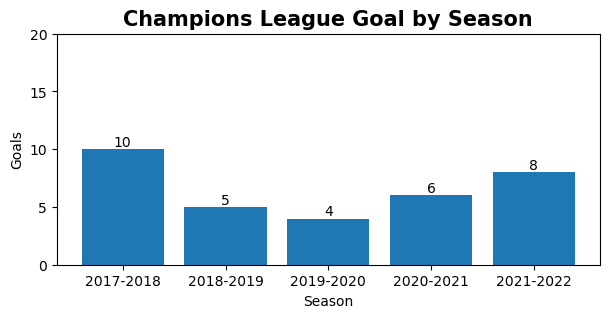

In [185]:
pltbar1(res)